# Assignment - Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
evaluation_results = pd.DataFrame(columns = ['Model', 'F1-score', 'Std', 'Best Parameter'])

## Checking the Balance of the dataset

In [3]:
count_no_purc = len(dataset[dataset['Purchased']==0])
count_purc = len(dataset[dataset['Purchased']==1])
pct_of_no_purc = count_no_purc / (count_no_purc + count_purc)
pct_of_purc = count_purc / (count_no_purc + count_purc)
print(f'The ratio of "no purchased" to "purchased" instances is {round(pct_of_no_purc*100)}:{round(pct_of_purc*100)}')

The ratio of "no purchased" to "purchased" instances is 39:61


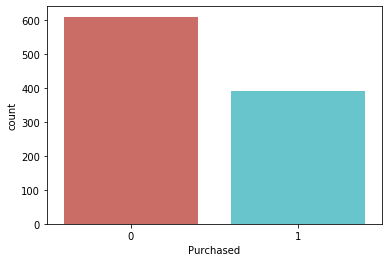

In [4]:
sns.countplot(y,data = dataset['Purchased'], palette='hls')
plt.show()

In [6]:
dataset.groupby('Purchased').mean()

,Height,Salary
Purchased,,
0,173.621483,24261.194373
1,179.018033,41584.926230


## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
print(X_train)

[[  171 18470]
 [  194 59989]
 [  158 30162]
 ...
 [  194 36553]
 [  171 30911]
 [  197 32474]]


In [10]:
print(X_test)

[[  172 10273]
 [  183 50394]
 [  194 23418]
 [  202 33214]
 [  204 18076]
 [  205 37637]
 [  166 30469]
 [  166 31425]
 [  167 49560]
 [  160 13467]
 [  183 22437]
 [  183 35948]
 [  196 58478]
 [  158 44704]
 [  198 33254]
 [  197 10283]
 [  158 49775]
 [  150 14678]
 [  181 48339]
 [  178 18453]
 [  202 26816]
 [  168 30682]
 [  177 50241]
 [  185 39565]
 [  185 48558]
 [  172 51781]
 [  196 43651]
 [  174 10742]
 [  193 11818]
 [  161 13624]
 [  156 44968]
 [  204 36179]
 [  157 44384]
 [  190 46038]
 [  166 54334]
 [  192 45725]
 [  164 33719]
 [  156 55007]
 [  205 18601]
 [  180 51588]
 [  178 43737]
 [  191 36498]
 [  170 53295]
 [  163 25722]
 [  164 21477]
 [  203 12623]
 [  179 14217]
 [  192 21819]
 [  175 21191]
 [  162 25548]
 [  162 38800]
 [  186 55507]
 [  203 22738]
 [  155 14528]
 [  159 16279]
 [  181 47110]
 [  159 57471]
 [  175 52107]
 [  153 44330]
 [  159 44960]
 [  183 35589]
 [  165 24498]
 [  193 28362]
 [  166 14642]
 [  177 44170]
 [  166 55764]
 [  190 36

## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
print(X_train)

[[-0.33625629 -1.11653024]
 [ 1.05629735  1.74353401]
 [-1.12335183 -0.31111896]
 ...
 [ 1.05629735  0.12912938]
 [-0.33625629 -0.25952359]
 [ 1.23793478 -0.15185528]]


In [14]:
print(X_test)

[[-2.75710484e-01 -1.68118610e+00]
 [ 3.90293430e-01  1.08257598e+00]
 [ 1.05629735e+00 -7.75683934e-01]
 [ 1.54066383e+00 -1.00879882e-01]
 [ 1.66175545e+00 -1.14367120e+00]
 [ 1.72230126e+00  2.03801449e-01]
 [-6.38985347e-01 -2.89971054e-01]
 [-6.38985347e-01 -2.24116351e-01]
 [-5.78439536e-01  1.02512533e+00]
 [-1.00226021e+00 -1.46116527e+00]
 [ 3.90293430e-01 -8.43260779e-01]
 [ 3.90293430e-01  8.74535477e-02]
 [ 1.17738897e+00  1.63944776e+00]
 [-1.12335183e+00  6.90616500e-01]
 [ 1.29848059e+00 -9.81244551e-02]
 [ 1.23793478e+00 -1.68049725e+00]
 [-1.12335183e+00  1.03993575e+00]
 [-1.60771831e+00 -1.37774472e+00]
 [ 2.69201810e-01  9.41015921e-01]
 [ 8.75643783e-02 -1.11770130e+00]
 [ 1.54066383e+00 -5.41610417e-01]
 [-5.17893726e-01 -2.75298406e-01]
 [ 2.70185679e-02  1.07203647e+00]
 [ 5.11385051e-01  3.36613027e-01]
 [ 5.11385051e-01  9.56101883e-01]
 [-2.75710484e-01  1.17812041e+00]
 [ 1.17738897e+00  6.18079886e-01]
 [-1.54618863e-01 -1.64887872e+00]
 [ 9.95751535e-01 -1

# K-Nearest Neighbors (K-NN) Classifier

## Training the K-NN model on the Training set

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Applying GridSearch to find the best K for the K-NN

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1000, test_size=0.2, random_state=12345)
grid = dict()
grid['n_neighbors'] = np.arange(1, 21, 1)
grid_search = GridSearchCV(classifier, grid, scoring='f1', cv=cv, n_jobs=-1)
grid_search.fit(sc.transform(X), y)
best_score = grid_search.best_score_
best_K = grid_search.best_params_
print("Best f1_score: {:.2f} %".format(best_score*100))
std = grid_search.cv_results_['std_test_score'][grid_search.best_index_]
print("Standard Deviation: {:.2f} %".format(std*100))
print("Best K:", best_K['n_neighbors'])
evaluation_results = evaluation_results.append({'Model': 'K-NN', 'F1-score': best_score, 'Std': std, 'Best Parameter': best_K}, ignore_index=True)
results = pd.concat([pd.DataFrame({"n_neighbors": np.arange(1, 21, 1)}), pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score']]],axis=1)
results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)

Best f1_score: 93.12 %
Standard Deviation: 1.50 %
Best K: 4


,n_neighbors,mean_test_score,std_test_score
0,4,0.931213,0.014981
1,6,0.930489,0.015816
2,5,0.929348,0.015840
3,7,0.928866,0.015574
4,9,0.927326,0.015525
5,8,0.927168,0.015846
6,11,0.926740,0.015925
7,1,0.926730,0.015077
8,3,0.926019,0.015197
9,13,0.925652,0.016029


## Retraining the model with the best hyperparameters

In [17]:
classifier = KNeighborsClassifier(n_neighbors = best_K['n_neighbors'], metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

## Making the Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix, f1_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
f1_score(y_test, y_pred)

[[ 75   1]
 [ 12 113]]


0.9456066945606694

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


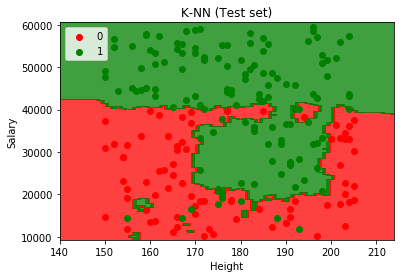

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Height')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Logistic Regression

## Training the Logistic Regression model on the Training set

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluating the Logistic Regression

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1000, test_size=0.2, random_state=12345)
scores = cross_val_score(classifier, sc.transform(X), y, scoring='f1', cv=cv)
print("F1-score: {:.2f} %".format(scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(scores.std()*100))
evaluation_results = evaluation_results.append({'Model': 'Logistic Regression', 'F1-score': scores.mean(), 'Std': scores.std()}, ignore_index=True)

F1-score: 81.76 %
Standard Deviation: 2.38 %


## Making the Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, f1_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 53  23]
 [ 16 109]]


## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


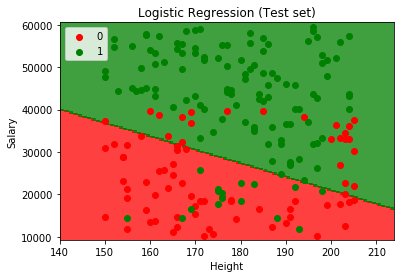

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Height')
plt.ylabel('Salary')
plt.legend()
plt.show()

# SVC Linear

## Training the SVC Linear model on the Training set

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Evaluating the SCV Linear

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1000, test_size=0.2, random_state=12345)
scores = cross_val_score(classifier, sc.transform(X), y, scoring='f1', cv=cv)
print("F1-score: {:.2f} %".format(scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(scores.std()*100))
evaluation_results = evaluation_results.append({'Model': 'SCV Linear', 'F1-score': scores.mean(), 'Std': scores.std()}, ignore_index=True)

F1-score: 82.25 %
Standard Deviation: 2.33 %


## Making the Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix, f1_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 54  22]
 [ 16 109]]


## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


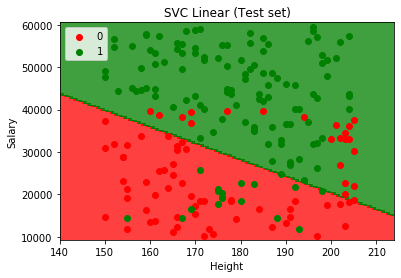

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVC Linear (Test set)')
plt.xlabel('Height')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Polynomial SVC

## Training the Polynomial SVC model on the Training set

In [28]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Applying GridSearch to find the best Degree for the Poly SVC

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1000, test_size=0.2, random_state=12345)
grid = dict()
grid['degree'] = np.arange(2, 6, 1)
grid_search = GridSearchCV(classifier, grid, scoring='f1', cv=cv, n_jobs=-1)
grid_search.fit(sc.transform(X), y)
best_score = grid_search.best_score_
best_m = grid_search.best_params_
print("Best f1_score: {:.2f} %".format(best_score*100))
std = grid_search.cv_results_['std_test_score'][grid_search.best_index_]
print("Standard Deviation: {:.2f} %".format(std*100))
print("Best Degree:", best_m['degree'])
evaluation_results = evaluation_results.append({'Model': 'Polynomial SVC', 'F1-score': best_score, 'Std': std, 'Best Parameter': best_m}, ignore_index=True)
results = pd.concat([pd.DataFrame({"degree": np.arange(2, 6, 1)}), pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score']]],axis=1)
results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)

Best f1_score: 83.87 %
Standard Deviation: 2.25 %
Best Degree: 3


,degree,mean_test_score,std_test_score
0,3,0.838722,0.022530
1,5,0.817380,0.023475
2,4,0.768814,0.024261
3,2,0.754985,0.023888


## Retraining the model with the best hyperparameters

In [30]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', degree = best_m['degree'])
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Making the Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix, f1_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
f1_score(y_test, y_pred)

[[ 46  30]
 [ 10 115]]


0.851851851851852

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


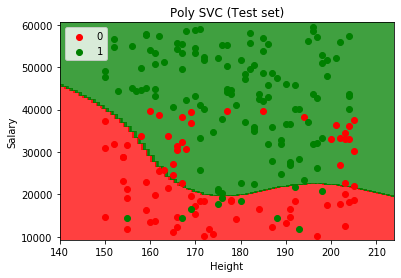

In [32]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Poly SVC (Test set)')
plt.xlabel('Height')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Gaussian SVC

## Training the Gaussian SVC model on the Training set

In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Applying GridSearch to find the best C for the Gaussian SVC

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1000, test_size=0.2, random_state=12345)
grid = dict()
grid['C'] = np.array([0.2, 0.5, 1.2, 1.8, 3])
grid_search = GridSearchCV(classifier, grid, scoring='f1', cv=cv, n_jobs=-1)
grid_search.fit(sc.transform(X), y)
best_score = grid_search.best_score_
best_C = grid_search.best_params_
print("Best f1_score: {:.2f} %".format(best_score*100))
std = grid_search.cv_results_['std_test_score'][grid_search.best_index_]
print("Standard Deviation: {:.2f} %".format(std*100))
print("Best C:", best_C['C'])
evaluation_results = evaluation_results.append({'Model': 'Gaussian SVC', 'F1-score': best_score, 'Std': std, 'Best Parameter': best_C}, ignore_index=True)
results = pd.concat([pd.DataFrame({"degree": np.array([0.2, 0.5, 1.2, 1.8, 3])}), pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score']]],axis=1)
results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)

Best f1_score: 91.86 %
Standard Deviation: 1.70 %
Best C: 3.0


,degree,mean_test_score,std_test_score
0,3.0,0.918631,0.016996
1,1.8,0.914608,0.017660
2,1.2,0.912398,0.017798
3,0.5,0.904314,0.019078
4,0.2,0.889348,0.019602


## Retraining the model with the best hyperparameters

In [35]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = best_C['C'])
classifier.fit(X_train, y_train)

SVC(C=3.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Making the Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix, f1_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
f1_score(y_test, y_pred)

[[ 68   8]
 [ 10 115]]


0.9274193548387097

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


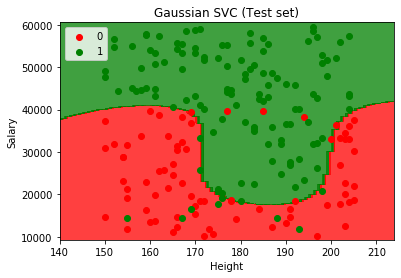

In [37]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Gaussian SVC (Test set)')
plt.xlabel('Height')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Evaluation Results for Model Comparison

In [38]:
evaluation_results.sort_values(by='F1-score', ascending=False).reset_index(drop=True)

,Model,F1-score,Std,Best Parameter
0,K-NN,0.931213,0.014981,{'n_neighbors': 4}
1,Gaussian SVC,0.918631,0.016996,{'C': 3.0}
2,Polynomial SVC,0.838722,0.022530,{'degree': 3}
3,SCV Linear,0.822478,0.023350,NaN
4,Logistic Regression,0.817570,0.023826,NaN
